In [4]:
import sqlite3
import geopandas
import pandas
import torch
import shapely.wkb
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

conn = sqlite3.connect('db.sqlite3')
data = conn.execute("""
select commune.name, income, avg(data.value)
from commune
join data on commune.id = data.commune_id
join report on data.report_id = report.id
where report.description = 'Ingresos Programa de Salud Mental por mes y año'
  and commune.income is not null
group by commune.id
""").fetchall()

# drop unixtimestamp
data = pandas.DataFrame(data, columns=['commune', 'income', 'value'])
data

,commune,income,value
0,SAN JOAQUIN,772440,27.987245
1,SAN MIGUEL,1158765,41.462069
2,SAN RAMON,657161,31.568710
3,INDEPENDENCIA,718622,63.048507
4,LA CISTERNA,863400,72.265217
5,PENALOLEN,1025659,78.093159
6,PROVIDENCIA,1797751,25.474820
7,LA REINA,1587617,20.951140
8,CALERA DE TANGO,882261,8.989130
9,COLINA,1281069,54.497207


In [6]:
# correlation
data[['income', 'value']].corr()

,income,value
income,1.000000,-0.019947
value,-0.019947,1.000000


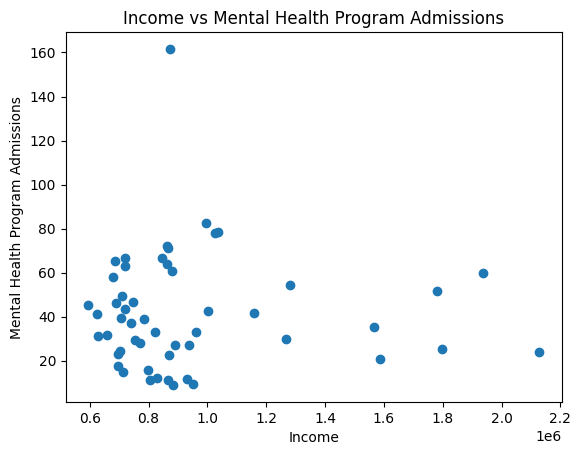

In [7]:
# plot income vs value
plt.scatter(data['income'], data['value'])
plt.xlabel('Income')
plt.ylabel('Mental Health Program Admissions')
plt.title('Income vs Mental Health Program Admissions')
plt.show()